Question 1

<ipython-input-1-96db0d09488d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_charges = insurance.groupby(['age_group', 'smoker'])['charges'].mean().unstack()


smoker               no           yes
age_group                            
18-30       4418.568274  27518.035262
30-40       6337.362945  30271.246415
40-50       9183.342097  32654.718697
50-60      12749.344280  37508.752875
60-70      15232.709480  40630.695190


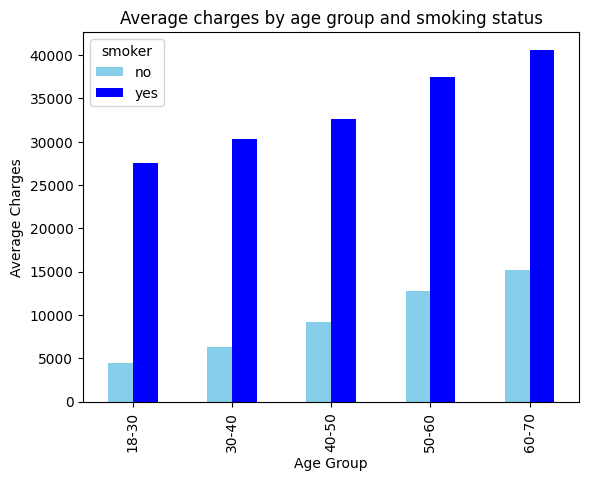

60-70
25397.985710600253


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate the average charges in each group by smokers and non-smokers
insurance = pd.read_csv('insurance.csv')
insurance.loc[:,'age_group'] = pd.cut(insurance['age'], bins= [18,30,40,50,60,70], right = False, labels= ['18-30', '30-40', '40-50', '50-60','60-70'])
average_charges = insurance.groupby(['age_group', 'smoker'])['charges'].mean().unstack()
print(average_charges)
# plot the bar chart that shows the average charges for smokers and non-smokers within each age group
average_charges.plot(kind = 'bar', color = ['skyblue', 'blue'])
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average charges by age group and smoking status')
plt.show()
# identify the age group with the largest difference in charges between smokers and non-smokers
differences = average_charges['yes'] - average_charges['no']
max_difference_age_group = differences.idxmax()
max_difference = differences.max()
print(max_difference_age_group)
print(max_difference)

Question 2

          charges   age   bmi  children
charges      1.00  0.30  0.20      0.07
age          0.30  1.00  0.11      0.04
bmi          0.20  0.11  1.00      0.01
children     0.07  0.04  0.01      1.00


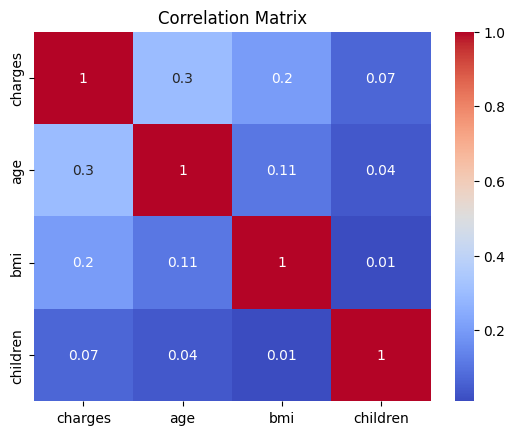

age


In [ ]:
# Generate a correlation matrix
numerical_var = insurance[['charges', 'age', 'bmi', 'children']]
corr_matrix = numerical_var.corr().round(2)
print(corr_matrix)
# Visualize a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Identify the variable that has the strongest correlation with charges
strongest_corr = corr_matrix['charges'].drop('charges').abs().idxmax()
print(strongest_corr)

Question 3

In [ ]:
# Create a linear regression model
import pandas as pd
import statsmodels.api as sm

x = pd.get_dummies(insurance[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
y = insurance['charges']
x = sm.add_constant(x)
x = x.astype(float)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:57:35   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

Question 5a

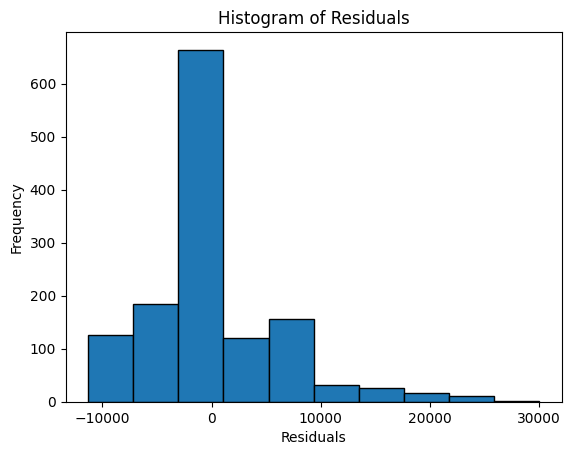

8.384716645406298e-29


In [ ]:
# Create a histogram of residuals
residuals = model.resid
plt.hist(residuals, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
# test for normality
from scipy import stats
stat, P_value = stats.shapiro(residuals)
print(P_value)

Question 5b

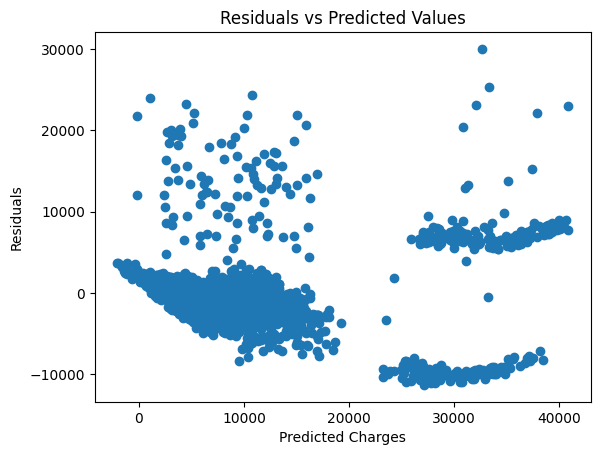

In [ ]:
# Plot residuals vs predicted values
predicted_values = model.predict(x)
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Question 6a

In [ ]:
# transform into logarithmic
import numpy as np
insurance.loc[:,'log_charges'] = np.log(insurance['charges'])
y_log = insurance['log_charges']
model_log = sm.OLS(y_log,x).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:59:01   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0306      0.072  

Question 6b

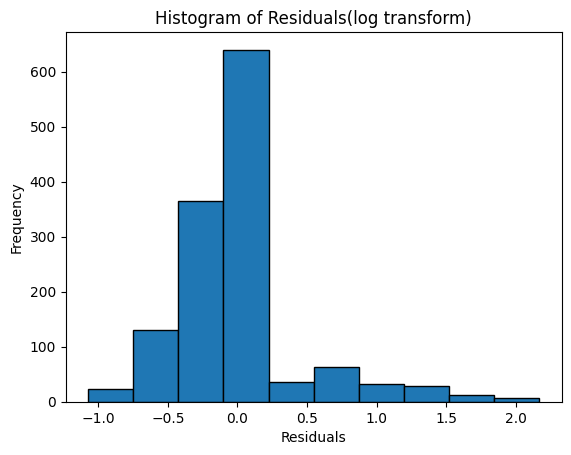

6.800944817277559e-35


In [ ]:
# Create a histogram of residuals
residuals_log = model_log.resid
plt.hist(residuals_log, bins=10, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals(log transform)')
plt.show()
# test for normality
from scipy import stats
stat, P_value_log = stats.shapiro(residuals_log)
print(P_value_log)

Question 6c

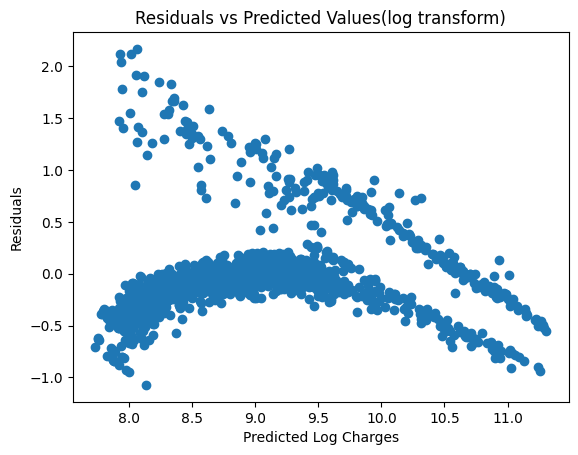

In [ ]:
# Plot residuals vs predicted values
predicted_values_log = model_log.predict(x)
plt.scatter(predicted_values_log, residuals_log)
plt.xlabel('Predicted Log Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values(log transform)')
plt.show()

Question 7

In [ ]:
# calculate the r_squared and adj_r_squared
r_squared = model_log.rsquared
adj_r_squared = model_log.rsquared_adj

print(r_squared)
print(adj_r_squared)

0.7679477609588368
0.7665509077516666


Question 8

In [ ]:
# input the new dataset
import numpy as np

New_data = pd.DataFrame({
    'age':[25,45,32,54,29],
    'gender':['male','female', 'male','female','female'],
    'bmi':[28.0, 35.2, 30.5, 24.7, 22.8],
    'children':[1,3,0,2,1],
    'smoker':['no','yes','no','yes','yes'],
    'region':['northeast','southeast','northwest','southwest','southeast']
    })
# predict the charges
new_data_num = pd.get_dummies(New_data[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
for col in [c for c in x.columns if c != 'const']:
    if col not in new_data_num.columns:
        new_data_num[col] = 0
new_data_num = sm.add_constant(new_data_num)
new_data_num = new_data_num[x.columns]
predicted_charges_log = model_log.predict(new_data_num)
predicted_charges = np.exp(predicted_charges_log.astype(float))
print(predicted_charges.round(2))

0     4007.95
1    47109.14
2     4473.38
3    51917.39
4    18720.13
dtype: float64


Question 9

In [ ]:
# create a new variable binary_charges
𝜇 = insurance['charges'].mean()
insurance['binary_charges'] = 0
for index, charge in enumerate(insurance['charges']):
    if charge > μ:
        insurance.loc[index, 'binary_charges'] = 1
count_0 = len(insurance[insurance['binary_charges'] == 0])
count_1 = len(insurance[insurance['binary_charges'] == 1])
print(count_0/(count_0 + count_1))
print(count_1/(count_0 + count_1))

0.6860986547085202
0.31390134529147984


Question 10

In [ ]:
# Create a logistic regression model
import pandas as pd
import statsmodels.api as sm

x_logistic = pd.get_dummies(insurance[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
y_logistic = insurance['binary_charges']
x_logistic = sm.add_constant(x_logistic)
x_logistic = x_logistic.astype(float)
model_logistic = sm.Logit(y_logistic,x_logistic).fit()
print(model_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.282812
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         binary_charges   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1329
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.5455
Time:                        21:00:27   Log-Likelihood:                -378.40
converged:                       True   LL-Null:                       -832.49
Covariance Type:            nonrobust   LLR p-value:                9.772e-191
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.3114      0.639     -8.311      0.000      -6.564      -4.059
age       

Question 12

In [ ]:
# input the new dataset（we should input the dataset here, but the dataset is exactly the same as the one the Question 8. So we can just use that dataset）

# predict the charges
new_data_num_logistic = pd.get_dummies(New_data[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
for col in [c for c in x.columns if c != 'const']:
    if col not in new_data_num_logistic.columns:
        new_data_num_logistic[col] = 0
new_data_num_logistic = sm.add_constant(new_data_num_logistic)
new_data_num_logistic = new_data_num_logistic[x.columns]
new_data_num_logistic = new_data_num_logistic.astype(float)
# Use the logistic regression model to predict binary_charges for the new dataset
# Convert the predicted probabilities into binary classifications (0 or 1)
predicted_binary_logistic = model_logistic.predict(new_data_num_logistic)
predicted_binary_logistic = (predicted_binary_logistic > 0.5).astype(int)
print(predicted_binary_logistic)

0    0
1    1
2    0
3    1
4    1
dtype: int64


Question 13

In [ ]:
# create the first and third quartile of the charges variable
q1 = insurance['charges'].quantile(0.25)
q3 = insurance['charges'].quantile(0.75)
# create a new variable
multiclass_charges = []
for charge in insurance['charges']:
    if charge <= q1:
        multiclass_charges.append('low')
    elif charge > q3:
        multiclass_charges.append('high')
    else:
        multiclass_charges.append('medium')
insurance['multiclass_charges'] = multiclass_charges
# calculate the rate for each category
total = len(insurance)
low_count = len(insurance[insurance['multiclass_charges'] == 'low'])
medium_count = len(insurance[insurance['multiclass_charges'] == 'medium'])
high_count = len(insurance[insurance['multiclass_charges'] == 'high'])
print(low_count/total)
print(medium_count/total)
print(high_count/total)

0.25037369207772797
0.4992526158445441
0.25037369207772797


Question 14

In [ ]:
# create a decision tree model
from sklearn.tree import DecisionTreeClassifier
x_decisionTree = pd.get_dummies(insurance[['age', 'gender', 'bmi', 'children', 'smoker', 'region']])
y_decisionTree = insurance['multiclass_charges']
tree_model = DecisionTreeClassifier(max_depth=4,random_state=42)
tree_model = tree_model.fit(x_decisionTree, y_decisionTree)
n_leaves = tree_model.get_n_leaves()
print(n_leaves)

15


Question 15

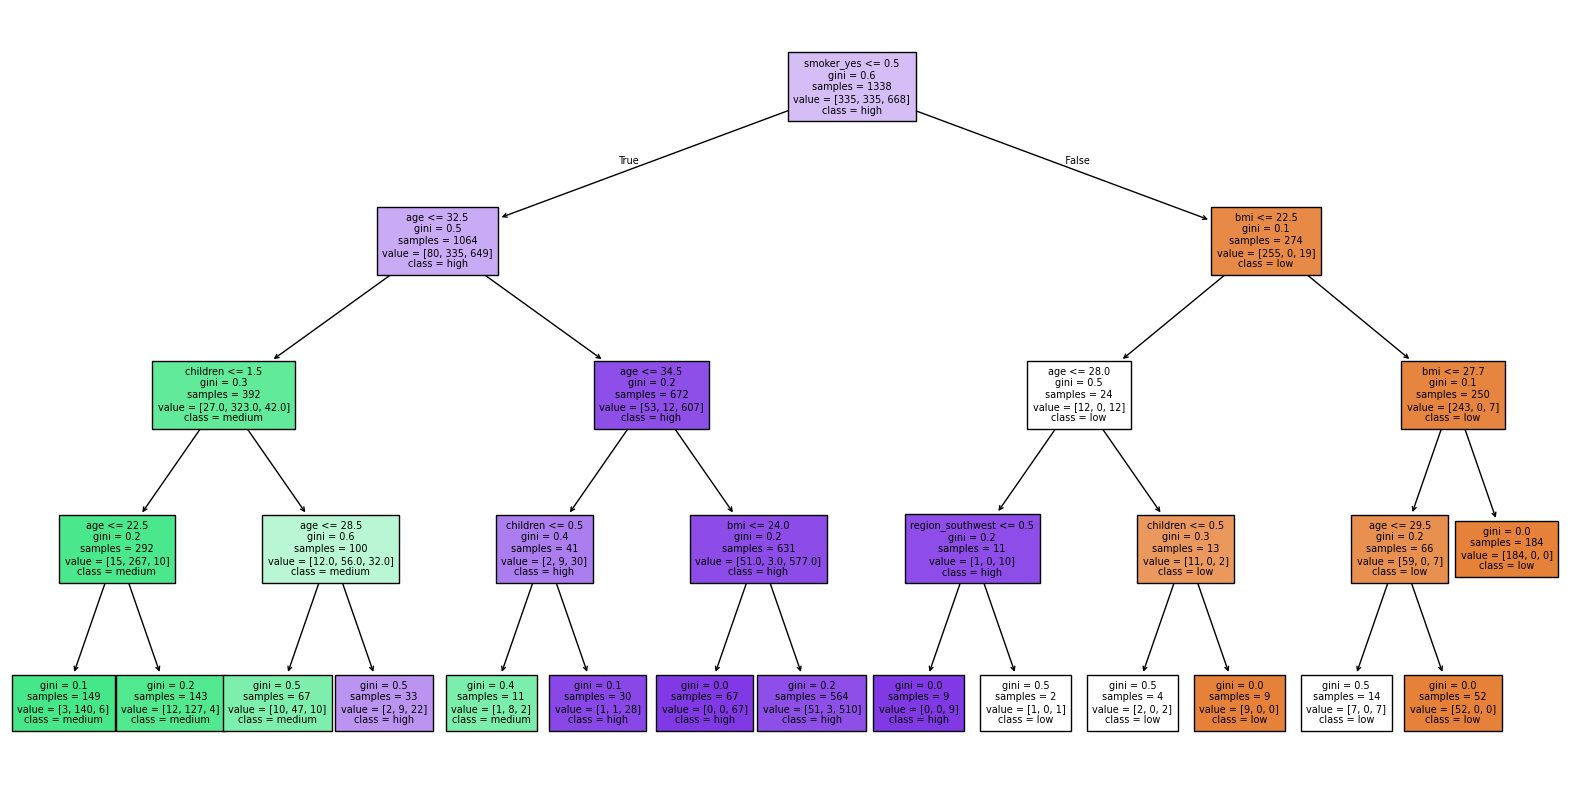

In [ ]:
# plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model,
          feature_names=x_decisionTree.columns,
          class_names=['low', 'medium', 'high'],
          filled=True,
          fontsize=7,
          precision=1)
plt.show()

Question 16

In [ ]:
# input the new dataset (we should input the dataset here, but the dataset is exactly the same as the one the Question 8. So we can just use that dataset）)

# predict the charges
new_data_num_decisionTree = pd.get_dummies(New_data[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
for col in x_decisionTree.columns:
    if col not in new_data_num_decisionTree.columns:
        new_data_num_decisionTree[col] = 0
new_data_num_decisionTree = new_data_num_decisionTree[x_decisionTree.columns]

predicted_decisionTree = tree_model.predict(new_data_num_decisionTree)
print(predicted_decisionTree)


['low' 'high' 'low' 'high' 'high']


Question 17a

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, auc

insurance = pd.read_csv('insurance.csv')

# create a new variable binary_charges
mean_value = insurance['charges'].mean()
insurance['binary_charges'] = (insurance['charges'] > mean_value).astype(int)

# Create a logistic regression model
x = pd.get_dummies(insurance[['age', 'gender', 'bmi', 'children', 'smoker', 'region']], drop_first=True)
y = insurance['binary_charges']
x = sm.add_constant(x)
x = x.astype(float)
model = sm.Logit(y,x).fit()

# create the confusion matrix when threshold is 0.2
y_prob = model.predict(x)
threshold_1 = 0.2
y_pred_1 = (y_prob > threshold_1).astype(int)
conf_matrix_1 = confusion_matrix(y, y_pred_1,labels=[1, 0])
print(conf_matrix_1)

Optimization terminated successfully.
         Current function value: 0.282812
         Iterations 10
[[365  55]
 [195 723]]


Question 17b

In [ ]:
# create the confusion matrix when threshold is 0.8
threshold_2 = 0.8
y_pred_2 = (y_prob > threshold_2).astype(int)
conf_matrix_2 = confusion_matrix(y, y_pred_2,labels=[1, 0])
print(conf_matrix_2)

[[273 147]
 [  1 917]]


Question 17c

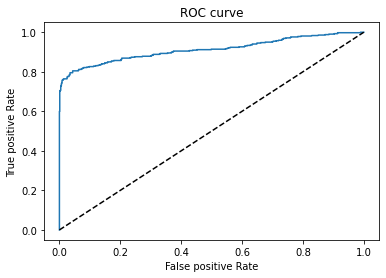

0.9122704637410521


In [ ]:
# plot the ROC
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y, y_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')
plt.show()

# calculate the AUC
auc_value = auc(fpr, tpr)
print(auc_value)

Question 18

In [ ]:
# # create the confusion matrix when threshold is 0.5
threshold_3 = 0.5
y_pred_3 = (y_prob > threshold_3).astype(int)
conf_matrix_3 = confusion_matrix(y, y_pred_3,labels=[1, 0])
print(conf_matrix_3)

[[276 144]
 [  1 917]]
